<h1>LINEAR REGRESSION</h1>

![](assets/linear-regression.png)

A regression problem is where the output is a real value like __stock price__, __weights__.

In linear regression we assume the __output__ is related to the input variables (which are called __features__) in linear fashion.

Hypothesis (the value we predict) for a input vector X is given as ![](assets/hypothesis.png) when there are _2 features_ i.e. vector X = [x1 x2]

[w0 w1 w2] is called weight vector which we need to find out so that cost is minimal

What is cost?
__Cost function__ is the average sum of absolute squares of the predicted value and actual value for all training input vectors

![](assets/cost-function.png)

We can take partial derivates w.r.t w0, w1, w2 and equate them to 0 and solve the three simultaneous equations to find out the weight values for at which cost function is minimum. But in real world scenarios, there are lot of features so solving those many equations is impractical.

So the approaches we are going to take :-
1. Gradient Descent
2. Stochastic Gradient Descent
3. Gradient Descent along with L1 and L2 regularizations
4. Normal Equations

The problem statement :-

<h3>Predict altitude values given longtitude and latitude values</h3>

The dataset we are going to use is [link](https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+(North+Jutland%2C+Denmark))

We are going to implement all those 4 methods from scratch in python without using any external APIs like scikit-learn.

However we are going to use
* pandas library for data reading purposes
* numpy library for all data manipulation purposes
* matplotlib library to plot the results

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("assets/dataset.txt", sep = ",", names = ["id", "longtitude", "latitude", "altitude"])

In [29]:
df.head()

,id,longtitude,latitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [30]:
#Normalizing Data
df = (df-df.mean())/df.std()

In [31]:
valueArray = df.to_numpy()

In [56]:
#Splitting dataset using 70-30 cross validation technique
train_size = int(0.7 * valueArray.shape[0])
train_X = valueArray[0:train_size, 1:3]
train_X = np.insert(train_X,0,1,axis=1) #Adding bias
train_Y = valueArray[0:train_size, 3:]
test_X = valueArray[train_size + 1:, 1:3]
test_X = np.insert(test_X,0,1,axis=1) #Adding bias
test_Y = valueArray[train_size + 1:, 3:]

In [33]:
def gradientDescent(X, Y, alpha, maxIterations, weights):
    """
    This function implements all the batch gradient descent with no regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    costs = []
    iters = []
    trainX = X
    trainY = Y
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration % 20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {}".format(iteration+1,alpha))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [34]:
def gradientDescentWithL1Regularization(X, Y, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L1 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points
    """
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    validationSize = int(0.1 * X.shape[0])
    validationX = X[0:validationSize]
    trainX = X[validationSize+1:]
    validationY =  Y[0:validationSize]
    trainY = Y[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        c = (regParameter)/(2 * m)
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0) + c * np.sign(weights)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 1) 
        weights = weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1) 
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [35]:
def gradientDescentWithL2Regularization(X, Y, alpha, maxIterations, weights, regParameter):
    """
    This function implements the gradient descents with L2 norm regularization.
    At each iteration all the weights are updated with gradient calculated
    over all training points. 
    """
    costs = []
    iters = []    
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    validationSize = int(0.1 * X.shape[0])
    validationX = X[0:validationSize]
    trainX = X[validationSize+1:]
    validationY =  Y[0:validationSize]
    trainY = Y[validationSize+1:]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        gradient = np.sum(trainX * (trainX @ weights.T - trainY), axis=0)
        weightList = [weights[0][0], weights[0][1], weights[0][2]]
        weightList = np.asarray(weightList)
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m) + regParameter/(2 * m) * np.linalg.norm(weightList, 2) 
        weights = (1 - alpha*regParameter/m)*weights - (alpha/m) * gradient
        #Plotting loss over train set for every 20 iterations
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-10:
            break
        prevCost = currCost
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {} and {} regularization parameter".format(iteration+1,alpha,regParameter))                             
    plt.title("Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [46]:
def stochasticGradientDescent(X, Y, alpha, maxIterations, weights):
    """
    This function implements stochastic gradient descent.
    In each iteration, gradient is calculated w.r.t. each training example
    so weights are updated 'm' times in each iteration.
    """
    costs = []
    iters = []
    shuffledData = np.concatenate((X, Y), axis = 1)
    np.random.shuffle(shuffledData)
    trainX = shuffledData[:, 0 : 3]
    trainY = shuffledData[:, 3 :]
    m = trainX.shape[0]
    prevCost, currCost = 0.0, 0.0
    for iteration in range(maxIterations):
        for i in range(m):
            gradient = trainX[i].dot(weights.T) - trainY[i]
            weights = weights - (alpha/m) * (gradient * trainX[i])
        currCost = np.sum(np.power(((trainX @ weights.T) - trainY),2))/(2 * m)
        if iteration%20 == 0:
            costs.append(currCost)
            iters.append(iteration + 1)    
        #Stopping Criterion
        if iteration != 0 and abs(prevCost - currCost) < 1e-5:
            break
        prevCost = currCost
        
    print("Optimal Cost is {}".format(currCost))
    print("Converting at {}th iteration with learning rate {}".format(iteration+1,alpha))        
    plt.title("Stochastic Gradient Descent")
    plt.xlabel("No Of Iterations")
    plt.ylabel("Cost")
    plt.plot(iters,costs)
    plt.show()
    return weights

In [37]:
def normalEquations(X, Y):
    """
    This function implements vectorization based linear regression.
    AW = B where A = X^T.X, B = X^T.Y. This is known as Normal Equation
    W = inv(A).B
    """  
    trainX = X
    trainY = Y
    A = trainX.T.dot(trainX)
    B = trainX.T.dot(trainY)
    weights = np.linalg.inv(A).dot(B)
    return weights

In [38]:
#Training our models

Optimal Cost is 0.49843225035306166
Converting at 1637th iteration with learning rate 0.01


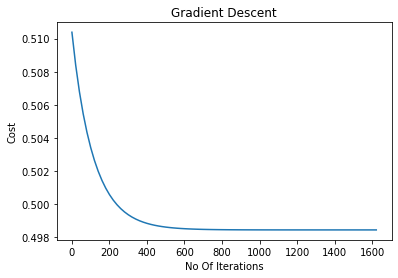

In [39]:
batch_weights = gradientDescent(train_X, train_Y, 0.01, 2000, np.zeros([1,3]))

Optimal Cost is 0.4984326331960267
Converting at 858th iteration with learning rate 0.02 and 0.7 regularization parameter


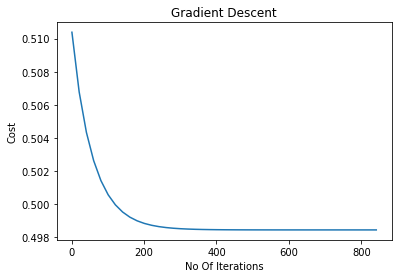

In [40]:
L1_weights = gradientDescentWithL1Regularization(train_X, train_Y, 0.02, 2000, np.zeros([1,3]), 0.7)

Optimal Cost is 0.49843255541296927
Converting at 1122th iteration with learning rate 0.015 and 0.8 regularization parameter


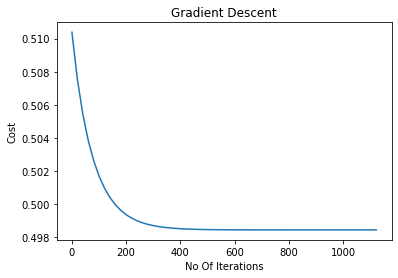

In [41]:
L2_weights = gradientDescentWithL2Regularization(train_X, train_Y, 0.015, 2000, np.zeros([1,3]), 0.8)

In [47]:
stochastic_weights = stochasticGradientDescent(train_X, train_Y, 0.05, 250, np.zeros([1,3]))

KeyboardInterrupt: 

In [45]:
normal_weights = normalEquations(train_X, train_Y)

In [ ]:
#Testing our models